In [1]:
import cv2
import numpy as np
import PIL.Image as Image
from IPython.display import display

In [2]:
flower = cv2.imread('./image/original.jpg')

In [3]:
flower.shape

(512, 512, 3)

In [4]:
flower_gray = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)

In [5]:
flower_gray.shape

(512, 512)

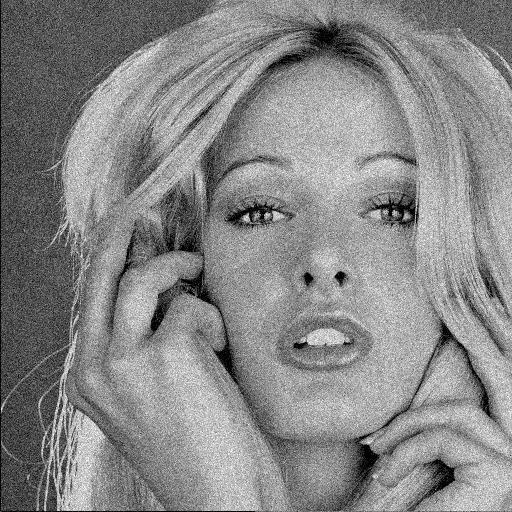

In [6]:
display(Image.fromarray(flower_gray))

In [7]:
filter = np.array([(1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1)]) * (1/25)

In [8]:
image_shape = flower_gray.shape
filter_shape = filter.shape

In [9]:
row = image_shape[0] + filter_shape[0] - 1
col = image_shape[1] + filter_shape[1] - 1
new_img_arr = np.zeros((row, col))

In [10]:
new_img_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        new_img_arr[i + int((filter_shape[0] - 1) // 2), j + int((filter_shape[1] - 1) // 2)] = flower_gray[i, j]

In [12]:
new_img_arr

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  21., ...,  98.,   0.,   0.],
       ...,
       [  0.,   0.,  87., ..., 113.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

# Arithmetic mean filter

In [13]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.sum(temp * filter)
        flower_gray[i, j] = res

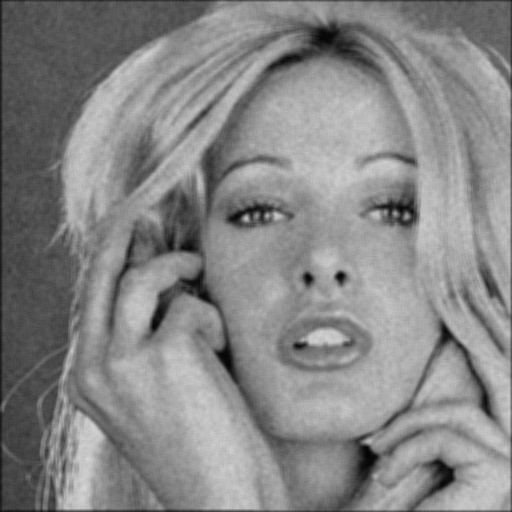

In [14]:
display(Image.fromarray(flower_gray))

# Geometric mean filter

In [15]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.prod(temp ** filter)
        flower_gray[i, j] = res

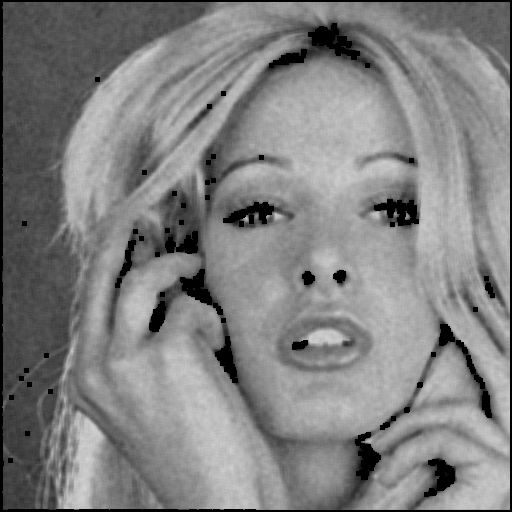

In [16]:
display(Image.fromarray(flower_gray))

# Harmonic mean filter

In [17]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = (filter_shape[0] * filter_shape[1]) // np.sum(np.reciprocal(temp))
        flower_gray[i, j] = res

C:\Users\levan\.conda\envs\nt4rever\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  after removing the cwd from sys.path.


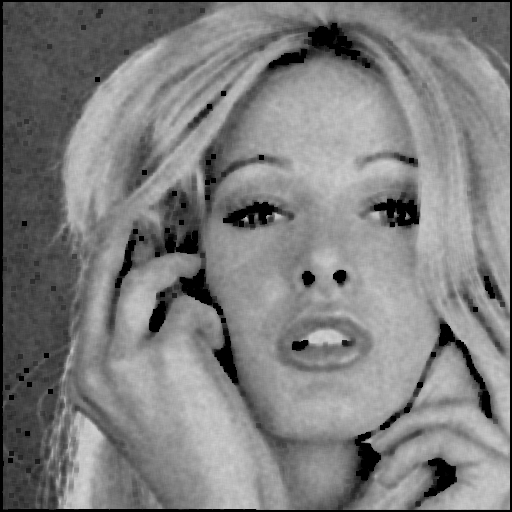

In [18]:
display(Image.fromarray(flower_gray))

# Contraharmonic mean filter

In [19]:
Q = -0.5
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = (np.sum(temp ** (Q + 1))) // (np.sum(temp ** Q))
        flower_gray[i, j] = res

C:\Users\levan\.conda\envs\nt4rever\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


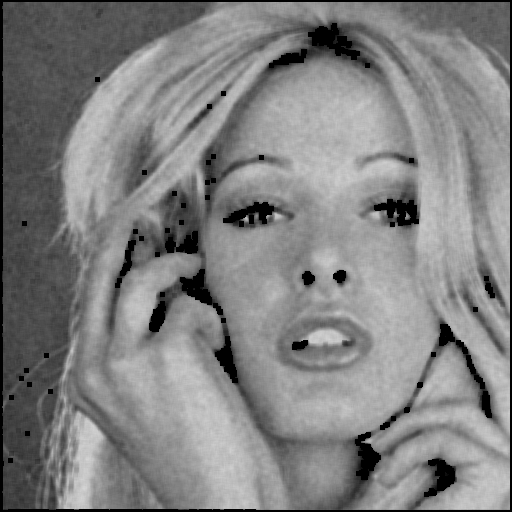

In [20]:
display(Image.fromarray(flower_gray))

# Order-statistic filters

## Median filter

In [21]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.median(temp)
        flower_gray[i, j] = res

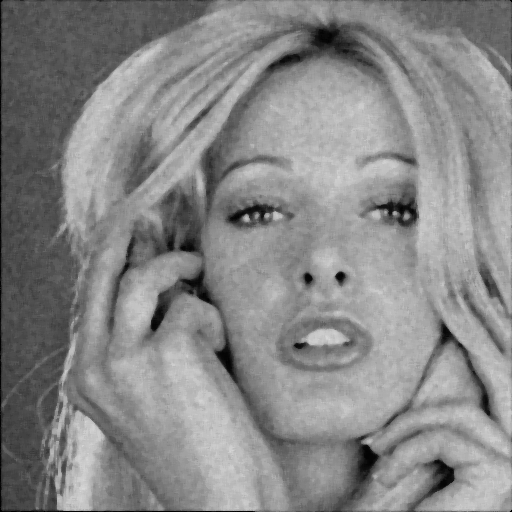

In [22]:
display(Image.fromarray(flower_gray))

# Max - min filter

In [23]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amax(temp)
        flower_gray[i, j] = res

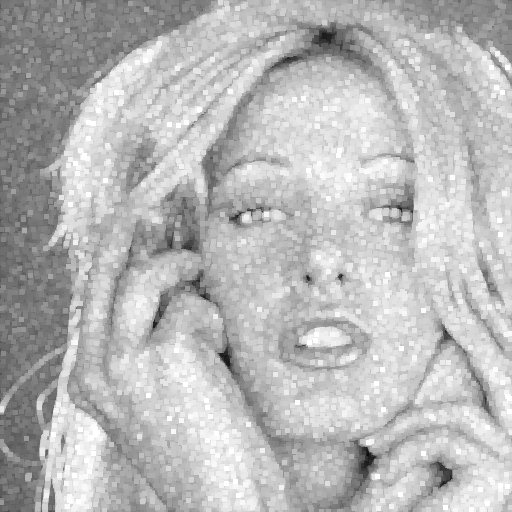

In [24]:
display(Image.fromarray(flower_gray))

In [25]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amin(temp)
        flower_gray[i, j] = res

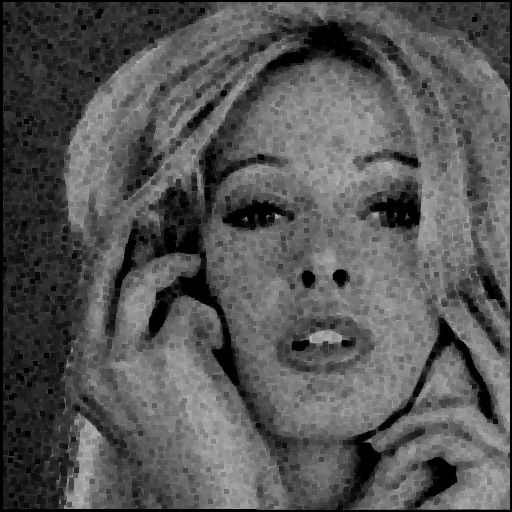

In [26]:
display(Image.fromarray(flower_gray))

# Midpoint filter

In [27]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        res = np.amax(temp * (1/2)) + np.amin(temp * (1/2))
        flower_gray[i, j] = res

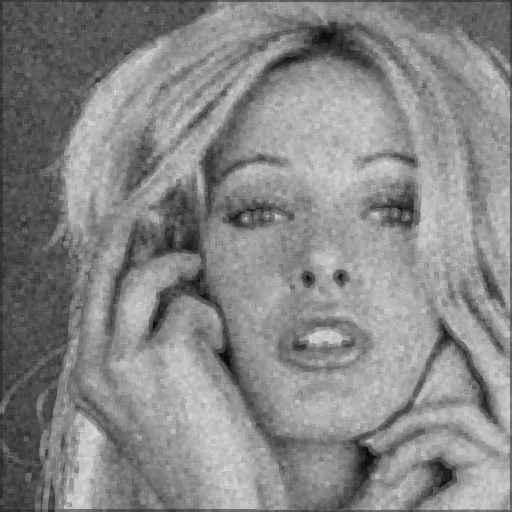

In [28]:
display(Image.fromarray(flower_gray))

# Alpha-trimmed mean filter

In [29]:
d = 2
filter = np.array([(1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1), (1, 1, 1, 1, 1)]) * (1/25)

In [30]:
for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]].copy()
        # max
        indices = temp.argpartition(temp.size - (d//2), axis = None)[-(d//2):]
        x, y = np.unravel_index(indices, temp.shape)
        temp[x, y] = 0
        
        # min
        indices = temp.argpartition(temp.size - (d//2), axis = None)[:(d//2)]
        x, y = np.unravel_index(indices, temp.shape)
        temp[x, y] = 0
        
        res = np.sum(temp * filter)
        flower_gray[i, j] = res

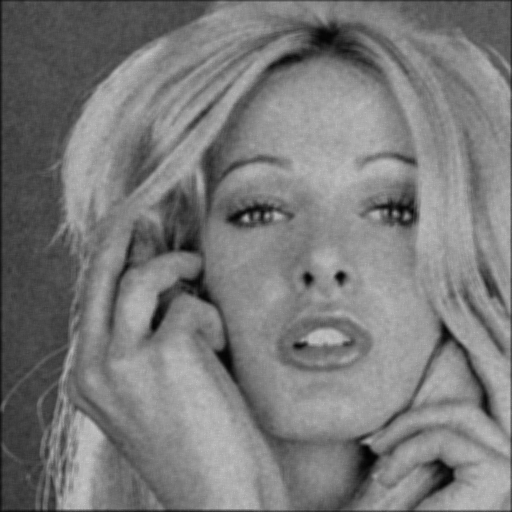

In [31]:
display(Image.fromarray(flower_gray))

# Adaptive filters

In [32]:
local_var = np.zeros((image_shape[0], image_shape[1]))
local_mean = np.zeros((image_shape[0], image_shape[1]))

for i in range(image_shape[0]):
    for j in range(image_shape[1]):
        temp = new_img_arr[i:i+filter_shape[0], j:j+filter_shape[1]]
        local_mean[i, j] = np.mean(temp)
        local_var[i, j] = np.mean(temp ** 2) - (local_mean[i, j] ** 2)     

In [33]:
local_var

array([[1258.88  , 1489.7696, 1672.8   , ..., 2062.8576, 2161.2736,
        1934.32  ],
       [1322.6496, 1535.9136, 1450.7104, ..., 1541.2544, 2183.2736,
        2289.8944],
       [1351.0496, 1370.3616,  936.32  , ...,  303.36  , 1632.5376,
        2246.2176],
       ...,
       [1428.4704, 1276.3296, 1074.5664, ...,  760.5184, 4433.6096,
        6415.6544],
       [1199.5456, 1230.7904, 1329.0784, ..., 3749.7056, 5342.3136,
        5553.92  ],
       [ 947.2   , 1089.1104, 1143.8784, ..., 5288.88  , 5631.28  ,
        5064.1024]])

In [34]:
local_mean

array([[ 21.6 ,  30.48,  40.4 , ...,  54.32,  44.08,  32.6 ],
       [ 26.48,  39.08,  51.36, ...,  74.84,  60.92,  45.16],
       [ 32.48,  48.28,  64.2 , ...,  92.4 ,  76.68,  56.32],
       ...,
       [ 32.36,  41.48,  53.56, ..., 151.04, 123.48,  94.16],
       [ 24.12,  31.36,  40.96, ..., 116.12,  94.92,  70.2 ],
       [ 17.8 ,  23.64,  28.96, ...,  86.  ,  70.4 ,  52.24]])

In [35]:
noise_var = np.sum(local_var) // len(local_var)
noise_var

352544.0

In [36]:
local_var = np.maximum(noise_var, local_var)

In [37]:
flower_gray = flower_gray - np.multiply((noise_var / local_var), (flower_gray - local_mean))


In [38]:
flower_gray = flower_gray.astype(np.uint8)

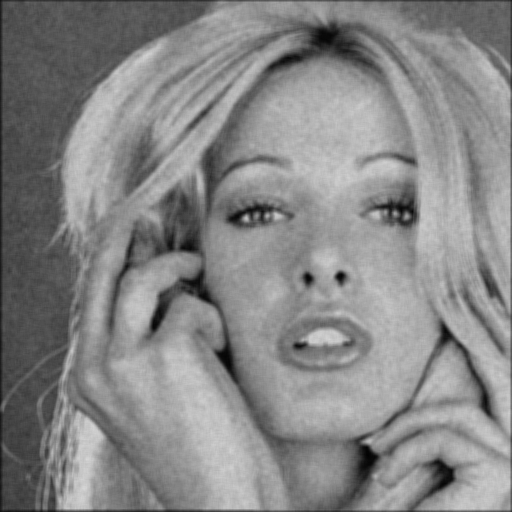

In [39]:
display(Image.fromarray(flower_gray))